<img src='https://upload.wikimedia.org/wikipedia/fr/thumb/e/ed/Logo_Universit%C3%A9_du_Maine.svg/1280px-Logo_Universit%C3%A9_du_Maine.svg.png' width="300" height="500">

# Hotel Reservation Dataset

## Présentation du dataset

### Objectif du dataset

Le dataset contient les données de réservations en ligne des clients d'un hotel. **Le but de ce jeu de données est d'arriver à prédir si le client va respecter sa réservation ou l'annuler**.

### Description des données

* **Booking_ID** : unique identifier of each booking
* **no_of_adults** : Number of adults
* **no_of_children** : Number of Children
* **no_of_weekend_nights** : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **no_of_week_nights** : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* **type_of_meal_plan** : Type of meal plan booked by the customer:
* **required_car_parking_space** : Does the customer require a car parking space? (0 - No, 1- Yes)
* **room_type_reserved** : Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* **lead_time**: Number of days between the date of booking and the arrival date
* **arrival_year** : Year of arrival date
* **arrival_month** : Month of arrival date
* **arrival_date** : Date of the month
* **market_segment_type** : Market segment designation.
* **repeated_guest** : Is the customer a repeated guest? (0 - No, 1- Yes)
* **no_of_previous_cancellations** : Number of previous bookings that were canceled by the customer prior to the current booking
* **no_of_previous_bookings_not_canceled** : Number of previous bookings not canceled by the customer prior to the current booking
* **avg_price_per_room** : Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* **no_of_special_requests** : Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* **booking_status** : Flag indicating if the booking was canceled or not.



In [1]:
import pandas as pd 
import numpy as np


dataset = pd.read_csv('archive/Hotel Reservations.csv')
dataset

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [2]:
dataset.values.shape

(36275, 19)

# Analyse des données
On regarde si des valeurs sont égales à Nan
<br>
ID à supprimer : pas pertinenent
<br>
Des variables à discrétiser : avg_price_per_room, lead_time, no_of_previous_bookings_not_canceled
<br>
Attention à certaines variables qui sont majoritairement nulles

In [3]:
def verificationNan(dataset):
    return dataset.isna().sum()

In [4]:
verificationNan(dataset)

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [5]:
def dataAnalysis(dataset):
    for series_name, series in dataset.items():
        #print(series_name)
        print("**************\n")
        print(series.value_counts())
        print("**************\n")
    

In [6]:
dataAnalysis(dataset)

**************

Booking_ID
INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: count, Length: 36275, dtype: int64
**************

**************

no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64
**************

**************

no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64
**************

**************

no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64
**************

**************

no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64
**************

**************

type_of_meal_pla

In [7]:
# to execute only once
dataset = dataset.drop('Booking_ID',axis=1)
dataset = dataset.drop('no_of_previous_bookings_not_canceled',axis=1)
dataset

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,94.50,0,Canceled


In [8]:
# Decomposition en quartile

def quartile(feature):
    prem_quartile = feature.quantile(0.25)
    de_quartile = feature.quantile(0.5)
    trois_quartile = feature.quantile(0.75)
    return (prem_quartile,de_quartile,trois_quartile)






# df.loc[df.C <= df.B, 'B':'E']
# quarter['avg_price_per_room'] = prem_quartile
# quarter





In [9]:
# Discrétistation des données


def discretisation(features,dataset):
    for feature in features:
        pQ,dQ,tQ = quartile(feature)
        dataset.loc[(feature <= pQ), feature.name] = 1
        dataset.loc[(feature > pQ) & (feature <= dQ), feature.name] = 2
        dataset.loc[(feature > dQ) & (feature <= tQ), feature.name] = 3
        dataset.loc[(feature > tQ), feature.name] = 4


In [10]:
continuFeatures = [dataset.avg_price_per_room,dataset.lead_time]
discretisation(continuFeatures,dataset)

In [11]:
dataset

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,4,2017,10,2,Offline,0,0,1.0,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,1,2018,11,6,Online,0,0,3.0,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,1.0,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,4,2018,5,20,Online,0,0,3.0,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,2,2018,4,11,Online,0,0,2.0,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,3,2018,8,3,Online,0,0,4.0,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,4,2018,10,17,Online,0,0,2.0,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,4,2018,7,1,Online,0,0,2.0,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,3,2018,4,21,Online,0,0,2.0,0,Canceled


In [12]:
#pd.qcut(dataset['no_of_previous_bookings_not_canceled'], 1 , labels=["peu"])

In [13]:
# Pre-process des données 


dataframe = dataset.sample(frac=1).reset_index(drop=True)



def train_test_dev_split(dataset):
    x_train = dataset.sample(frac=0.7)

    y_train = x_train['booking_status']
    
    x_test = dataset.drop(x_train.index,axis=0)
    
    y_test = x_test['booking_status']

    return (x_train,y_train,x_test,y_test)


x_train, y_train,x_test,y_test = train_test_dev_split(dataset)







In [14]:
# Detection des zeros pour préparer au classifieur bayesien naif
def zeroExistence(df):
    if (0 in df.values):
        return True
    return False

In [15]:
zeroExistence(dataset)

True

In [16]:
# Si zeros : +1 à toutes les données numériques

In [17]:
# Discretisation des données par la moyenne 

stats = x_train['avg_price_per_room'].describe()
slice = x_train.loc[x_train['avg_price_per_room'] <= 103.4]
slice

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,booking_status
1058,2,0,0,1,Not Selected,0,Room_Type 1,3,2018,12,23,Online,0,0,1.0,1,Not_Canceled
18032,2,0,1,3,Meal Plan 1,0,Room_Type 1,2,2018,6,20,Online,0,0,3.0,2,Not_Canceled
6431,3,0,1,1,Meal Plan 1,0,Room_Type 1,4,2018,8,22,Online,0,0,4.0,0,Canceled
22070,2,0,1,3,Meal Plan 1,0,Room_Type 4,3,2018,3,17,Online,0,0,2.0,0,Not_Canceled
24745,2,0,0,1,Meal Plan 1,0,Room_Type 1,1,2017,8,4,Online,0,0,2.0,0,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26051,2,0,1,1,Not Selected,0,Room_Type 1,2,2018,8,29,Online,0,0,3.0,0,Canceled
24812,2,2,2,3,Meal Plan 1,0,Room_Type 6,2,2018,9,11,Online,0,0,4.0,1,Canceled
19265,2,0,2,1,Meal Plan 2,0,Room_Type 1,4,2018,9,17,Offline,0,0,4.0,0,Canceled
1493,2,0,0,3,Meal Plan 1,0,Room_Type 1,2,2018,6,14,Online,0,0,3.0,0,Canceled


In [18]:
slice.keys

<bound method NDFrame.keys of        no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
1058              2               0                     0                  1   
18032             2               0                     1                  3   
6431              3               0                     1                  1   
22070             2               0                     1                  3   
24745             2               0                     0                  1   
...             ...             ...                   ...                ...   
26051             2               0                     1                  1   
24812             2               2                     2                  3   
19265             2               0                     2                  1   
1493              2               0                     0                  3   
22096             2               0                     0                  2   

      typ

## ZeroR

In [19]:
def zeroR(target):
    res =  target.value_counts()
    
    return res.idxmax()

In [20]:
test = zeroR(x_train.loc[:,'booking_status'])
test

'Not_Canceled'

In [21]:
def precision(target):
    nb = target.loc[:,'booking_status'].value_counts().loc[test]
    total = target.loc[:,'booking_status'].value_counts().sum()
    return nb / total
    

In [22]:
acc = precision(x_test)
acc

0.6738950656987963

# Création des tables de fréquences pour OneR


In [23]:
x_train['required_car_parking_space'].value_counts()

required_car_parking_space
0    24607
1      785
Name: count, dtype: int64

In [24]:
freq_table = pd.crosstab(x_train['no_of_children'], x_train['booking_status']) 
freq_table

booking_status,Canceled,Not_Canceled
no_of_children,,
0,7637,15920
1,367,702
2,328,421
3,3,11
9,1,1
10,0,1


In [25]:
freq_table[['Canceled']]

booking_status,Canceled
no_of_children,
0,7637
1,367
2,328
3,3
9,1
10,0


In [26]:
res = freq_table['Canceled'] + freq_table['Not_Canceled']
freq_table['Total'] = res
res

no_of_children
0     23557
1      1069
2       749
3        14
9         2
10        1
dtype: int64

In [27]:
freq_table

booking_status,Canceled,Not_Canceled,Total
no_of_children,,,
0,7637,15920,23557
1,367,702,1069
2,328,421,749
3,3,11,14
9,1,1,2
10,0,1,1


In [28]:

def frequency_table(data):
    freq_tables = []
    for series_name, series in data.items():
        if (series_name == "Booking_status"):
            pass
        freq_table = pd.crosstab(data[series_name], data['booking_status'])
        #print(type(freq_table))
        #freq_table.loc[:, 'Total'] = freq_table.loc[:,'Canceled'] + freq_table.loc[:,'Not_Canceled']
        freq_tables.append(freq_table)
    return freq_tables

 

In [29]:
freq = frequency_table(x_train)
for table in freq:
    print(table)
    

booking_status  Canceled  Not_Canceled
no_of_adults                          
0                     33            60
1                   1288          4117
2                   6379         11863
3                    634          1010
4                      2             6
booking_status  Canceled  Not_Canceled
no_of_children                        
0                   7637         15920
1                    367           702
2                    328           421
3                      3            11
9                      1             1
10                     0             1
booking_status        Canceled  Not_Canceled
no_of_weekend_nights                        
0                         3576          8198
1                         2409          4572
2                         2214          4184
3                           52            62
4                           53            33
5                           19             4
6                           12             3
7         

In [30]:
freq[0].loc[0].idxmax()

'Not_Canceled'

In [31]:
def ruleOver(freqs):
    series = []
    for freq in freqs:
        print()
        print(freq.index.name)
        print()
        labels = []
        rules = []
        index_labels = freq.index.values
        for idx_label in index_labels:
            labels.append(freq.loc[idx_label].idxmax())
            rules.append(idx_label)
        serie = pd.Series(labels,index=rules, name=freq.index.name)
        series.append(serie)
        print(serie)
    return series
        
        

In [32]:
rulesSeries = ruleOver(freq)


no_of_adults

0    Not_Canceled
1    Not_Canceled
2    Not_Canceled
3    Not_Canceled
4    Not_Canceled
Name: no_of_adults, dtype: object

no_of_children

0     Not_Canceled
1     Not_Canceled
2     Not_Canceled
3     Not_Canceled
9         Canceled
10    Not_Canceled
Name: no_of_children, dtype: object

no_of_weekend_nights

0    Not_Canceled
1    Not_Canceled
2    Not_Canceled
3    Not_Canceled
4        Canceled
5        Canceled
6        Canceled
7        Canceled
Name: no_of_weekend_nights, dtype: object

no_of_week_nights

0     Not_Canceled
1     Not_Canceled
2     Not_Canceled
3     Not_Canceled
4     Not_Canceled
5     Not_Canceled
6     Not_Canceled
7     Not_Canceled
8     Not_Canceled
9         Canceled
10        Canceled
11        Canceled
12        Canceled
13        Canceled
14        Canceled
15        Canceled
16        Canceled
17        Canceled
Name: no_of_week_nights, dtype: object

type_of_meal_plan

Meal Plan 1     Not_Canceled
Meal Plan 2     Not_Canceled
Meal P

In [33]:
tamp = 0
for serie in rulesSeries:
    print(serie.name)
    if (serie.name == 'lead_time'):
        tamp = serie
print(tamp)    

no_of_adults
no_of_children
no_of_weekend_nights
no_of_week_nights
type_of_meal_plan
required_car_parking_space
room_type_reserved
lead_time
arrival_year
arrival_month
arrival_date
market_segment_type
repeated_guest
no_of_previous_cancellations
avg_price_per_room
no_of_special_requests
booking_status
1    Not_Canceled
2    Not_Canceled
3    Not_Canceled
4        Canceled
Name: lead_time, dtype: object


In [34]:
def predict(model, x):
    #return model.loc[4]
    return model.loc[x.loc['lead_time']]
    
    

In [35]:
x_test.iloc[1]

no_of_adults                              2
no_of_children                            0
no_of_weekend_nights                      0
no_of_week_nights                         2
type_of_meal_plan               Meal Plan 1
required_car_parking_space                0
room_type_reserved              Room_Type 1
lead_time                                 4
arrival_year                           2018
arrival_month                             5
arrival_date                             20
market_segment_type                  Online
repeated_guest                            0
no_of_previous_cancellations              0
avg_price_per_room                      3.0
no_of_special_requests                    0
booking_status                     Canceled
Name: 3, dtype: object

In [36]:
def predictAll(model,X):
    predictions = []
    for i in range(X.shape[0]):
        pred = predict(model, X.iloc[i])
        predictions.append(pred)
    return predictions
        

In [37]:
preds = predictAll(tamp,x_test)
preds

['Not_Canceled',
 'Canceled',
 'Not_Canceled',
 'Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Canceled',
 'Not_Canceled',
 'Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Canceled',
 'Not_Canceled',
 'Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Not_Canceled',
 'Canceled',
 'Not_Canceled',
 'Canceled',
 'Not_Canceled',
 'Not_C

In [38]:
predict(tamp,x_test.iloc[1])

'Canceled'

In [39]:
def totalCol(data):
    data.loc['TotalCol'] = data.sum(axis=0)
    

In [40]:
y_test[0:1]


2    Canceled
Name: booking_status, dtype: object

In [41]:
y_train

1058     Not_Canceled
18032    Not_Canceled
6431         Canceled
22070    Not_Canceled
24745    Not_Canceled
             ...     
26051        Canceled
24812        Canceled
19265        Canceled
1493         Canceled
22096    Not_Canceled
Name: booking_status, Length: 25392, dtype: object

In [42]:
x_test[0:]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,booking_status
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,1.0,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,4,2018,5,20,Online,0,0,3.0,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,2,2018,4,11,Online,0,0,2.0,0,Canceled
5,2,0,0,2,Meal Plan 2,0,Room_Type 1,4,2018,9,13,Online,0,0,3.0,1,Canceled
7,2,0,1,3,Meal Plan 1,0,Room_Type 4,3,2018,12,26,Online,0,0,3.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36264,2,0,0,2,Meal Plan 1,0,Room_Type 4,4,2018,7,8,Online,0,0,3.0,0,Canceled
36267,2,0,1,0,Not Selected,0,Room_Type 1,2,2018,7,11,Online,0,0,2.0,0,Canceled
36268,1,0,0,3,Meal Plan 1,0,Room_Type 1,4,2018,11,1,Offline,0,0,3.0,0,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,4,2018,7,1,Online,0,0,2.0,2,Not_Canceled


In [43]:
x_train = x_train.drop('booking_status',axis=1)

In [44]:
x_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests
1058,2,0,0,1,Not Selected,0,Room_Type 1,3,2018,12,23,Online,0,0,1.0,1
18032,2,0,1,3,Meal Plan 1,0,Room_Type 1,2,2018,6,20,Online,0,0,3.0,2
6431,3,0,1,1,Meal Plan 1,0,Room_Type 1,4,2018,8,22,Online,0,0,4.0,0
22070,2,0,1,3,Meal Plan 1,0,Room_Type 4,3,2018,3,17,Online,0,0,2.0,0
24745,2,0,0,1,Meal Plan 1,0,Room_Type 1,1,2017,8,4,Online,0,0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26051,2,0,1,1,Not Selected,0,Room_Type 1,2,2018,8,29,Online,0,0,3.0,0
24812,2,2,2,3,Meal Plan 1,0,Room_Type 6,2,2018,9,11,Online,0,0,4.0,1
19265,2,0,2,1,Meal Plan 2,0,Room_Type 1,4,2018,9,17,Offline,0,0,4.0,0
1493,2,0,0,3,Meal Plan 1,0,Room_Type 1,2,2018,6,14,Online,0,0,3.0,0


In [45]:
import numpy as np
from sklearn.dummy import DummyClassifier
X = x_train


X_test = x_test



y = y_train

Y_test = y_test

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X)

#dummy_clf.predict(y)

# Prediction
dummy_clf.score(X, y)


0.6717076244486453

In [46]:
# Generalisation
dummy_clf.score(X_test, Y_test)

0.6738950656987963

In [47]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay

def confusion_matrix(y_pred, y_test):
    return cm(y_test, y_pred, labels=['Canceled', 'Not_Canceled'])

In [48]:
x_test.shape


(10883, 17)

In [49]:
y_test

2            Canceled
3            Canceled
4            Canceled
5            Canceled
7        Not_Canceled
             ...     
36264        Canceled
36267        Canceled
36268        Canceled
36272    Not_Canceled
36273        Canceled
Name: booking_status, Length: 10883, dtype: object

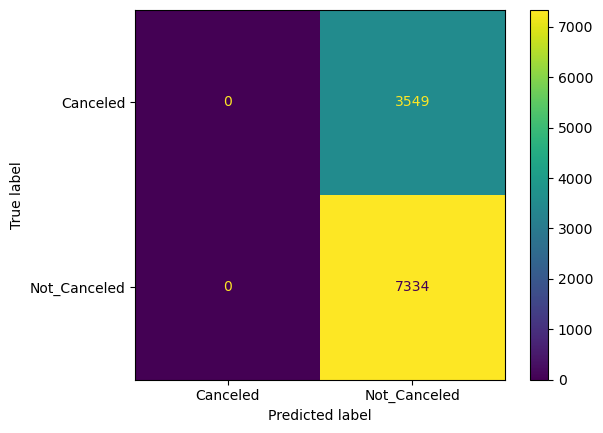

In [50]:
y_pred = [test] * x_test.shape[0]
#print(y_pred)
co = confusion_matrix(y_pred,y_test)
cd = ConfusionMatrixDisplay(confusion_matrix=co,display_labels=['Canceled', 'Not_Canceled'])
cd.plot()

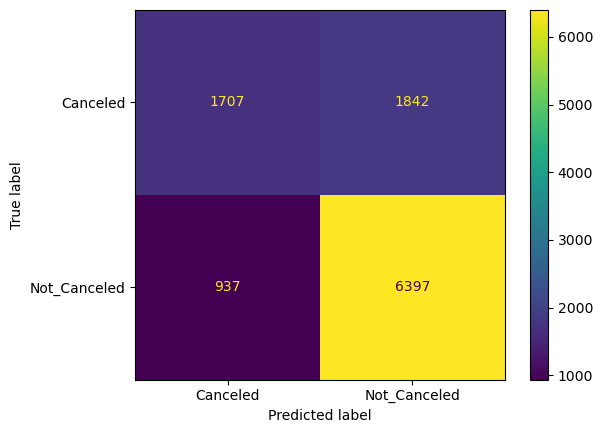

In [51]:
cmOneR = confusion_matrix(preds,y_test)
cdOneR = ConfusionMatrixDisplay(confusion_matrix=cmOneR,display_labels=['Canceled', 'Not_Canceled'])
cdOneR.plot()

In [52]:
def prec_rapp(co):
    t = sum(sum(co)) #Total
    t_p = co[1][1] # True Positive
    f_p = co[0][1] # false Positive
    f_n = co[1][0] # false negative
    t_n= co[0][0] # True negative

    prec = t_p / (t_p + f_p)
    rapp = t_p / (t_p + f_n)

    return prec, rapp

In [53]:
p, r = prec_rapp(cmOneR)
print("précison", p)
print()
print("rappel", r)

précison 0.7764291782983371

rappel 0.8722388873738751


In [54]:
p0, r0 = prec_rapp(co)
print("précison", p0)
print()
print("rappel", r0)

précison 0.6738950656987963

rappel 1.0
